# Time Series Forecasting on Weather Data

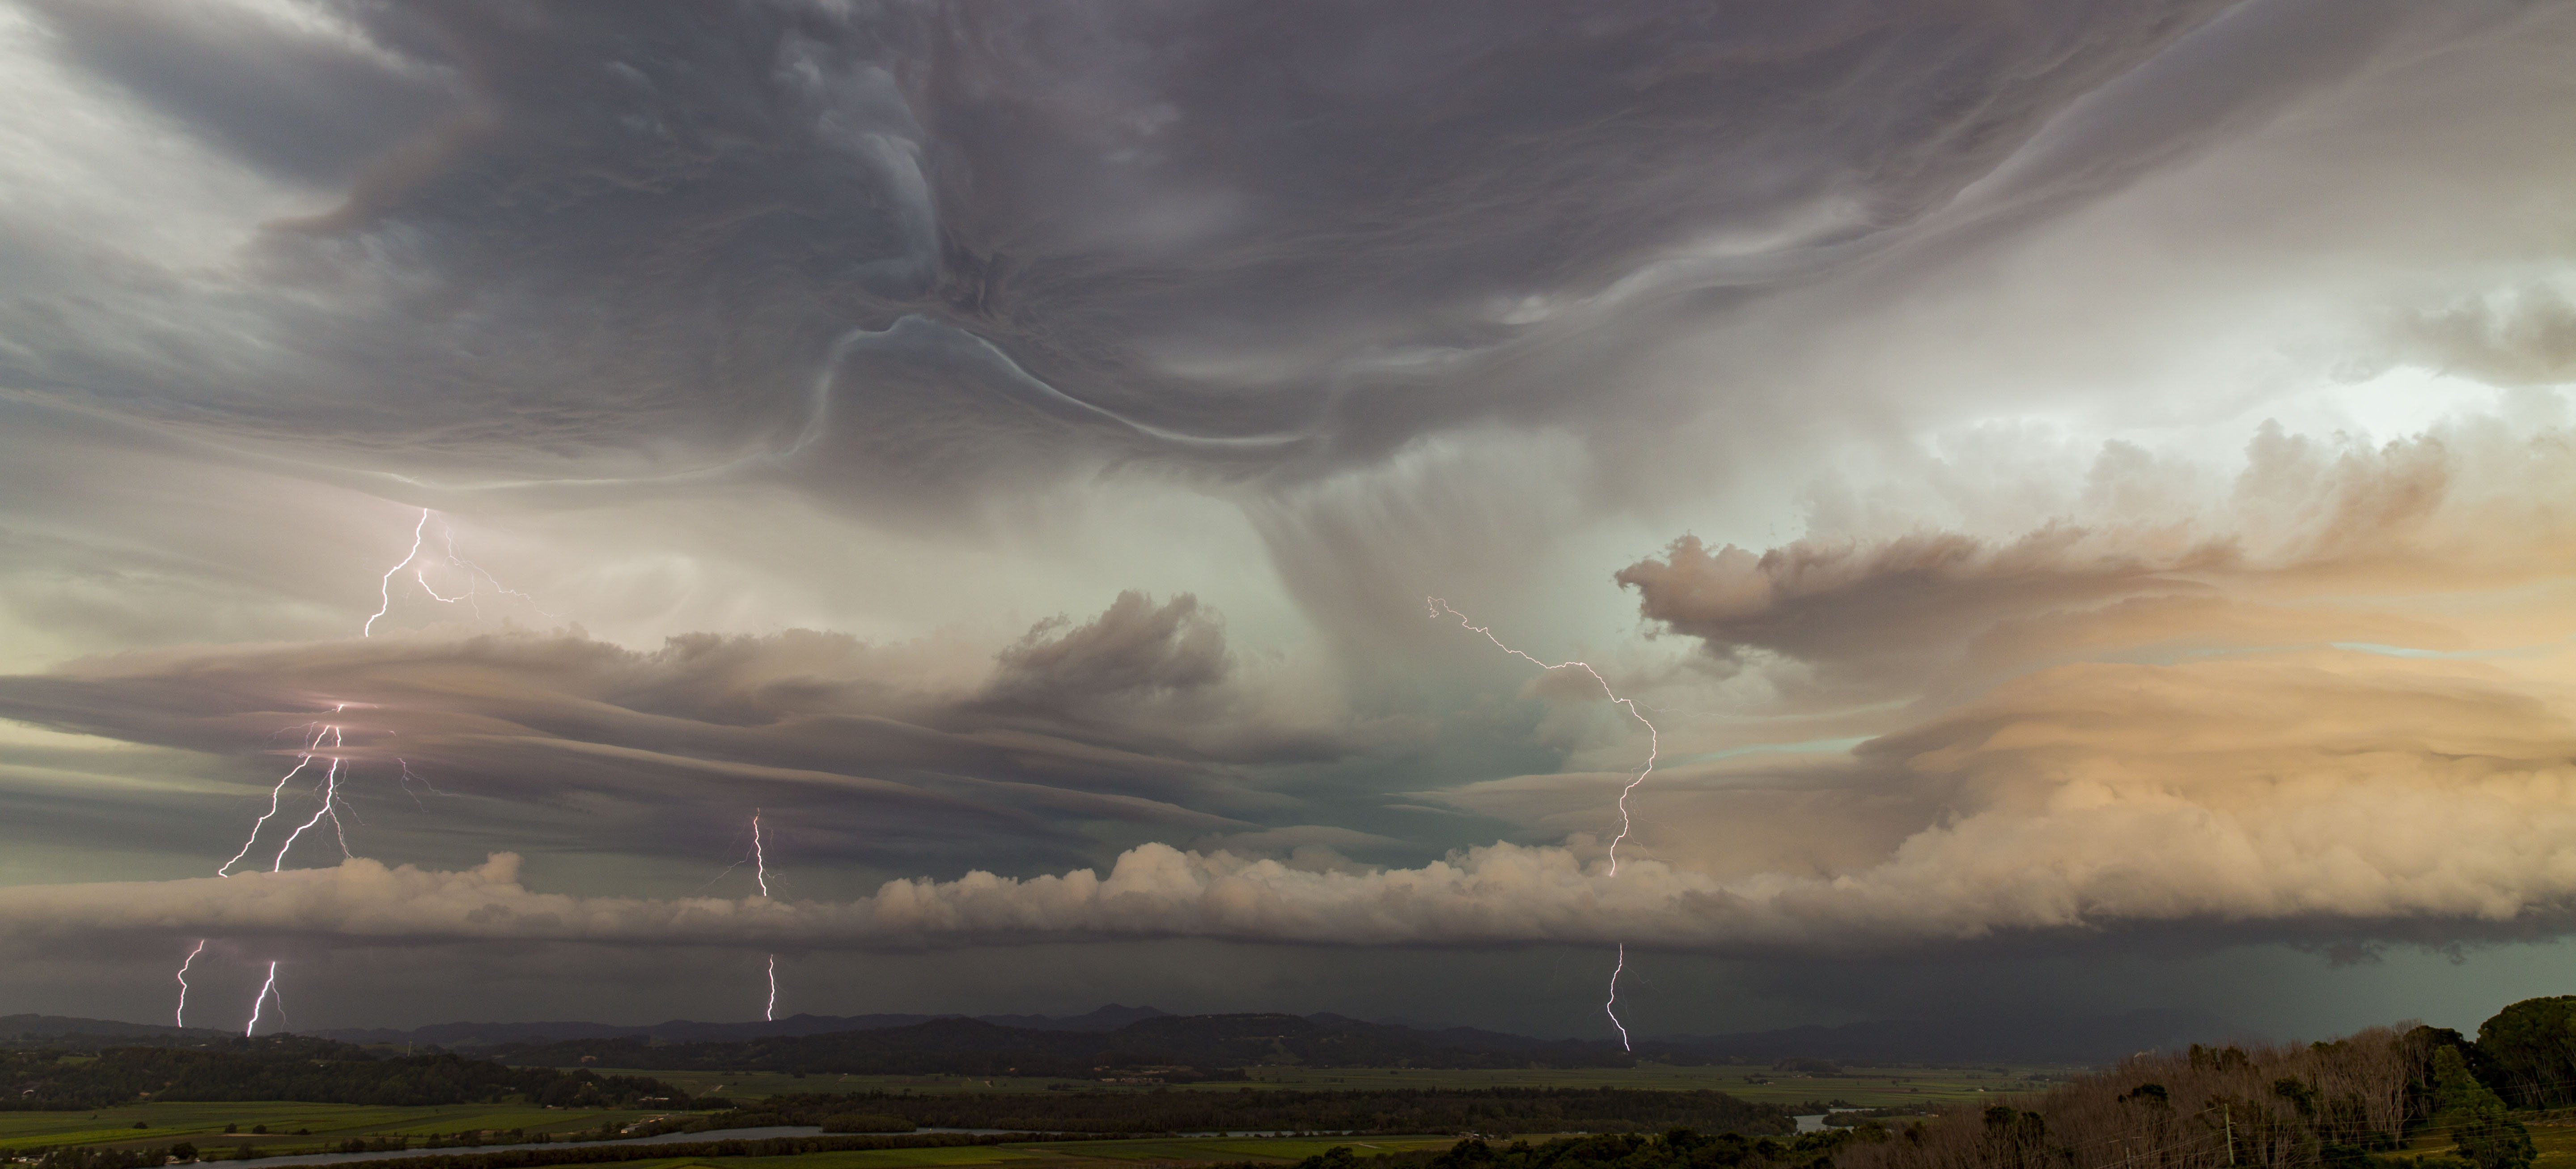

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import tha data
df= pd.read_csv("\weather_2016_2020_daily.xls",index_col='Date', parse_dates=['Date'])
df.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [3]:
df.shape

(1552, 18)

In [4]:
df.isna().sum()

Day            0
Temp_max       0
Temp_avg       0
Temp_min       0
Dew_max        0
Dew_avg        0
Dew_min        0
Hum_max        0
Hum_avg        0
Hum_min        0
Wind_max       0
Wind_avg       0
Wind_min       0
Press_max      0
Press_avg      0
Press_min      0
Precipit       0
day_of_week    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2016-01-06 to 2020-08-30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          1552 non-null   int64  
 1   Temp_max     1552 non-null   int64  
 2   Temp_avg     1552 non-null   float64
 3   Temp_min     1552 non-null   int64  
 4   Dew_max      1552 non-null   int64  
 5   Dew_avg      1552 non-null   float64
 6   Dew_min      1552 non-null   int64  
 7   Hum_max      1552 non-null   int64  
 8   Hum_avg      1552 non-null   float64
 9   Hum_min      1552 non-null   int64  
 10  Wind_max     1552 non-null   int64  
 11  Wind_avg     1552 non-null   float64
 12  Wind_min     1552 non-null   int64  
 13  Press_max    1552 non-null   float64
 14  Press_avg    1552 non-null   float64
 15  Press_min    1552 non-null   float64
 16  Precipit     1552 non-null   float64
 17  day_of_week  1552 non-null   int64  
dtypes: float64(8), int64(10)
memor

In [6]:
df.describe()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,15.726160,81.287371,71.752320,63.338273,66.615335,62.147423,56.939433,92.566366,74.365786,51.204897,15.855026,7.734987,1.375000,29.973840,29.903479,29.813273,0.157893,2.996134
std,8.800483,12.723409,12.490526,13.614699,12.279397,13.626795,15.246868,7.658203,11.700804,15.601436,4.842882,2.989969,2.500516,0.165958,0.160434,0.773583,0.658309,1.999029
min,1.000000,34.000000,27.600000,0.000000,18.000000,13.200000,0.000000,50.000000,31.500000,0.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000,0.000000
25%,8.000000,74.000000,63.175000,52.750000,61.000000,54.075000,45.750000,90.000000,67.400000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000
50%,16.000000,84.000000,74.300000,67.000000,70.000000,66.600000,62.000000,94.000000,75.000000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000
75%,23.000000,92.000000,82.000000,75.000000,76.000000,73.400000,70.000000,97.000000,82.700000,61.000000,18.000000,9.400000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000
max,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000


# Visuvalization

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

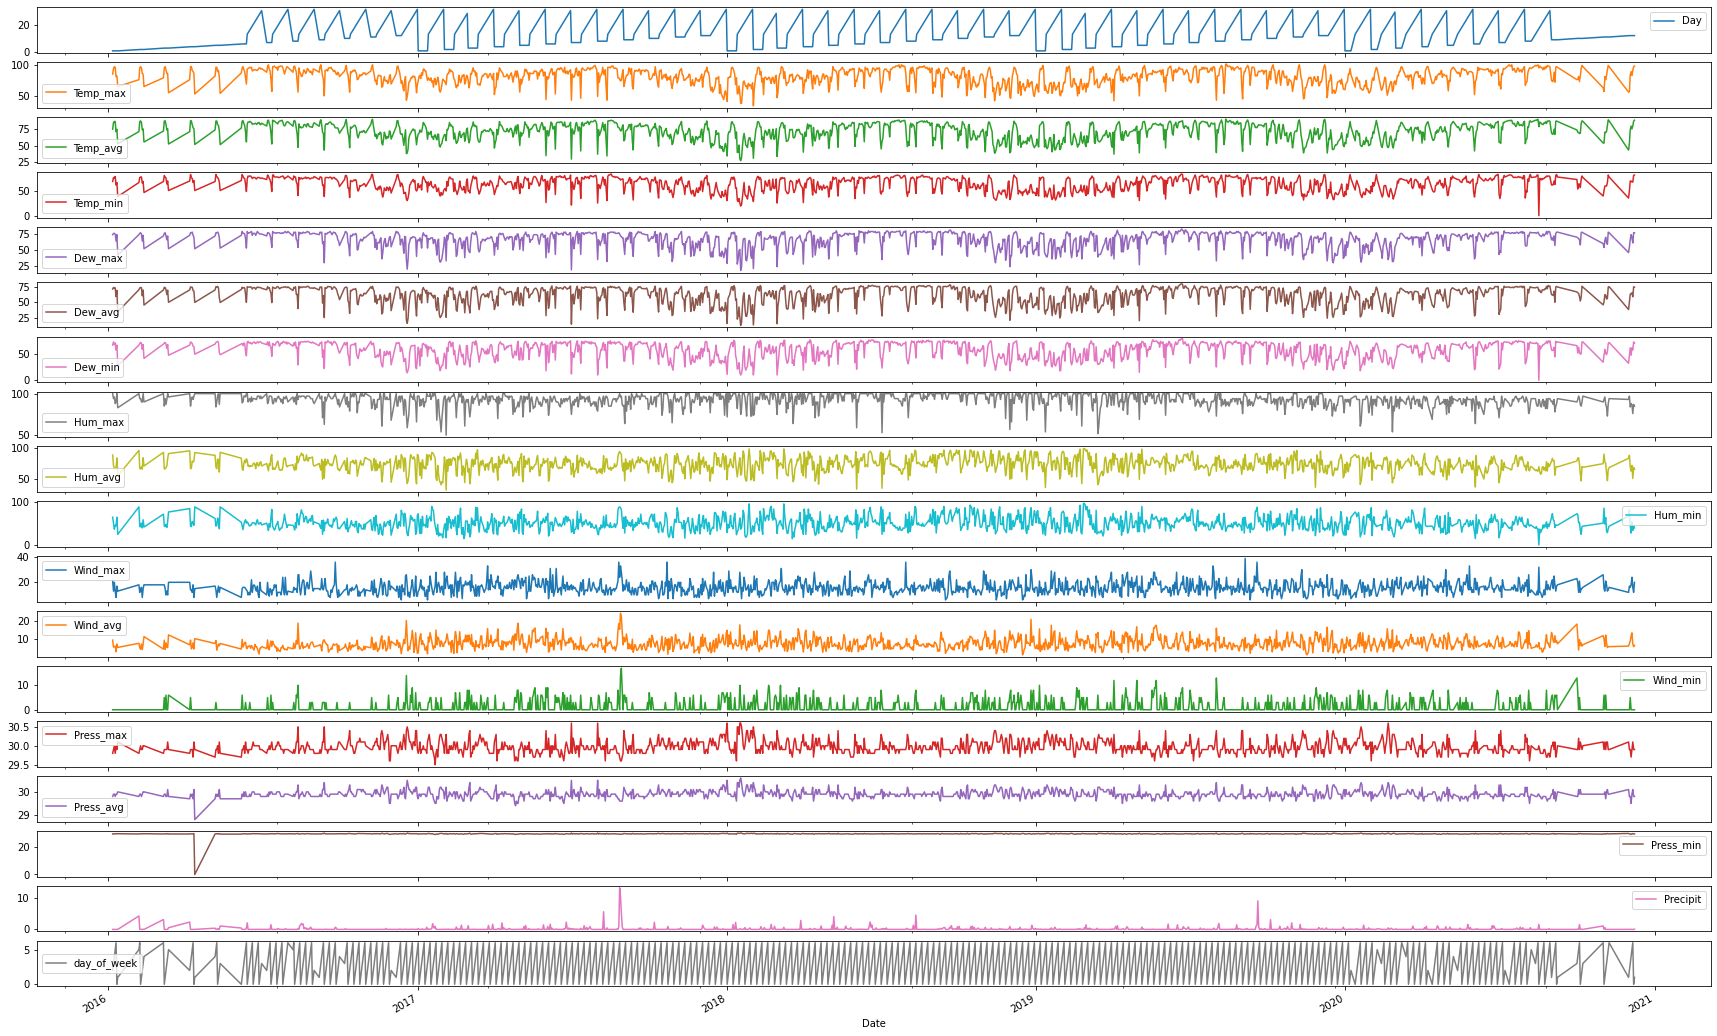

In [7]:
df.plot(subplots=True,figsize=(30,20))

# Resampling

In [8]:
#Monthwise
df_month=df.resample("M").mean()
df_month.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-31,1.0,85.714286,75.871429,66.000000,68.714286,65.114286,60.714286,93.000000,71.957143,47.714286,15.000000,6.257143,0.000000,29.928571,29.885714,29.828571,0.001429,3.0
2016-02-29,2.0,85.571429,76.342857,67.857143,70.142857,66.742857,63.142857,94.000000,74.600000,52.428571,14.571429,6.928571,0.000000,29.928571,29.900000,29.828571,0.625714,3.0
2016-03-31,3.0,84.285714,75.785714,68.857143,69.571429,67.257143,64.428571,93.571429,77.357143,54.285714,14.857143,7.185714,2.428571,29.914286,29.871429,29.785714,0.531429,3.0
2016-04-30,4.0,84.142857,76.000000,69.571429,71.428571,68.628571,64.857143,95.000000,80.028571,59.285714,14.428571,7.128571,0.714286,29.885714,29.700000,25.542857,0.338571,3.0
2016-05-31,5.0,84.000000,76.314286,70.571429,71.714286,68.028571,65.000000,94.000000,77.685714,57.000000,13.857143,6.914286,0.428571,29.885714,29.842857,29.800000,0.254286,3.0


<AxesSubplot:xlabel='Date'>

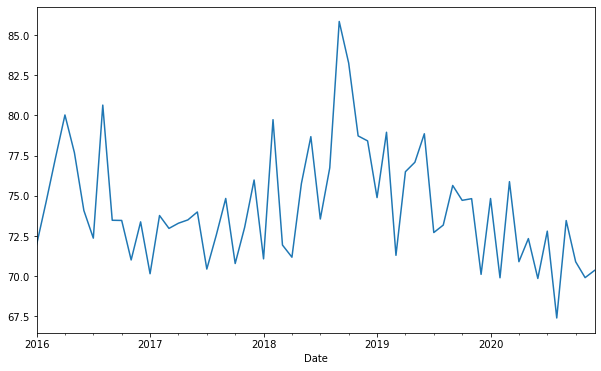

In [9]:
df_month['Hum_avg'].plot(figsize=(10, 6))

<BarContainer object of 60 artists>

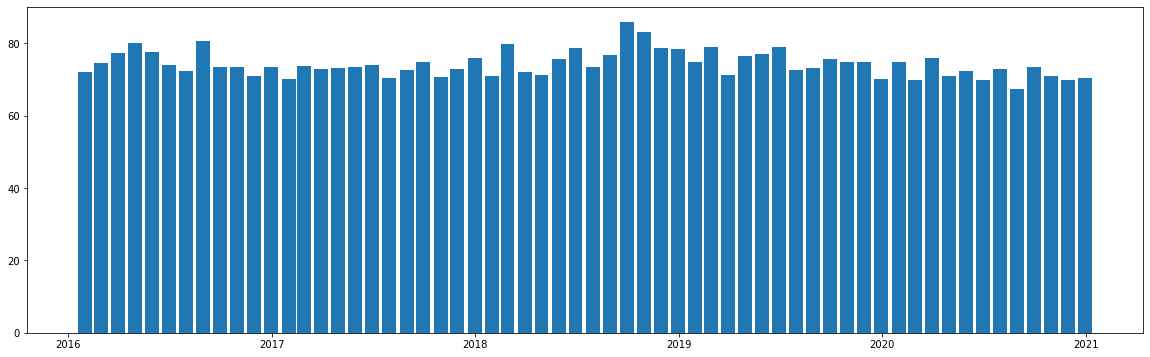

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_month['1988':].index, df_month.loc['1988':, "Hum_avg"], width=25, align='center')

In [11]:
#Yearwise
df_year= df.resample("Y").mean()
df_year.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-12-31,15.789720,85.299065,75.697196,67.649533,70.009346,66.101402,61.457944,92.817757,74.450000,50.313084,14.724299,6.589720,0.803738,29.978037,29.918224,29.717290,0.144393,2.981308
2017-12-31,15.720548,81.150685,71.566849,63.079452,65.761644,61.373973,56.112329,91.638356,72.929863,49.676712,16.213699,8.041096,1.482192,29.963014,29.894795,29.823836,0.219041,3.008219
2018-12-31,15.720548,79.367123,70.148493,61.912329,66.235616,61.576712,56.430137,95.235616,77.038082,54.142466,15.739726,7.726027,1.487671,29.993699,29.923562,29.849589,0.152959,2.991781
2019-12-31,15.720548,80.049315,70.324110,61.816438,65.805479,60.979178,55.484932,92.734247,74.848767,51.673973,16.076712,7.940000,1.457534,29.973151,29.896164,29.825479,0.140082,2.994521
2020-12-31,15.695473,82.703704,73.111111,64.358025,66.695473,62.439095,57.152263,89.477366,71.709053,49.168724,16.152263,7.989300,1.423868,29.957613,29.884362,29.809053,0.112099,3.000000


<AxesSubplot:xlabel='Date'>

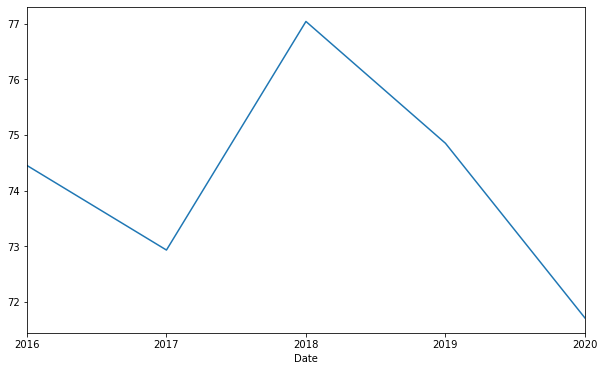

In [12]:
df_year['Hum_avg'].plot(figsize=(10, 6))

<BarContainer object of 5 artists>

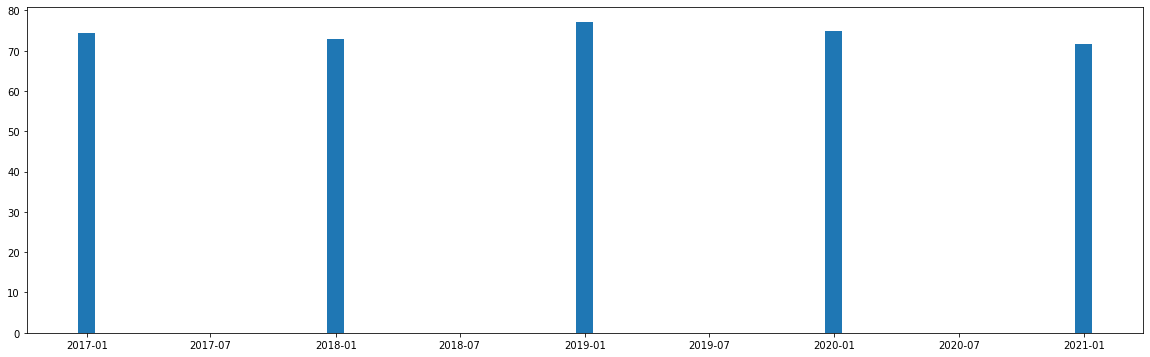

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_year['2016':].index, df_year.loc['2016':, "Hum_avg"], width=25, align='center')

In [14]:
df.shape,df_month.shape,df_year.shape

((1552, 18), (60, 18), (5, 18))

# Decomposition
Decomposition will show the observations and these three elements in the same plot:

Trend: Consistent upward or downward slope of a time series.

Seasonality: Clear periodic pattern of a time series.

Noise: Outliers or missing values



# Additive and Multiplicative decomposition

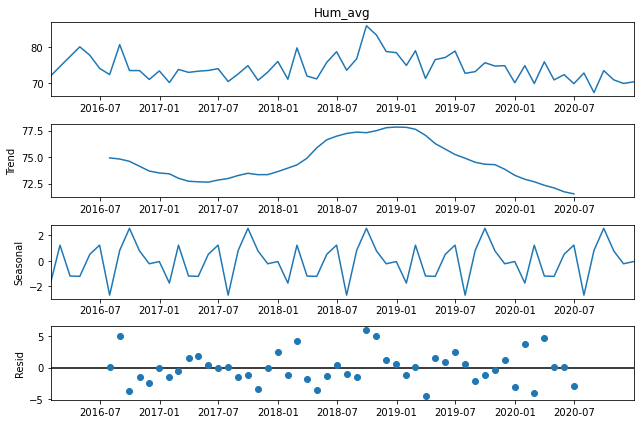

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 9,6

#Additive Decomposition
additive_decomposition = sm.tsa.seasonal_decompose(df_month['Hum_avg'], model='Additive')
fig = additive_decomposition.plot()


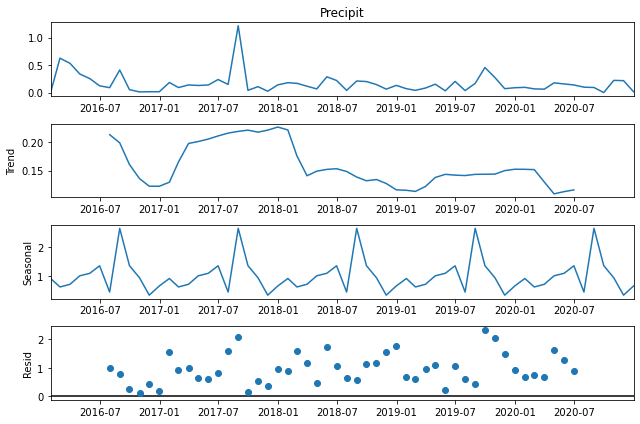

In [16]:
#Multiplicative Decompose
multiplicative_decomposition = sm.tsa.seasonal_decompose(df_month['Precipit'], model='multiplicative')
fig = multiplicative_decomposition.plot()

# Rolling

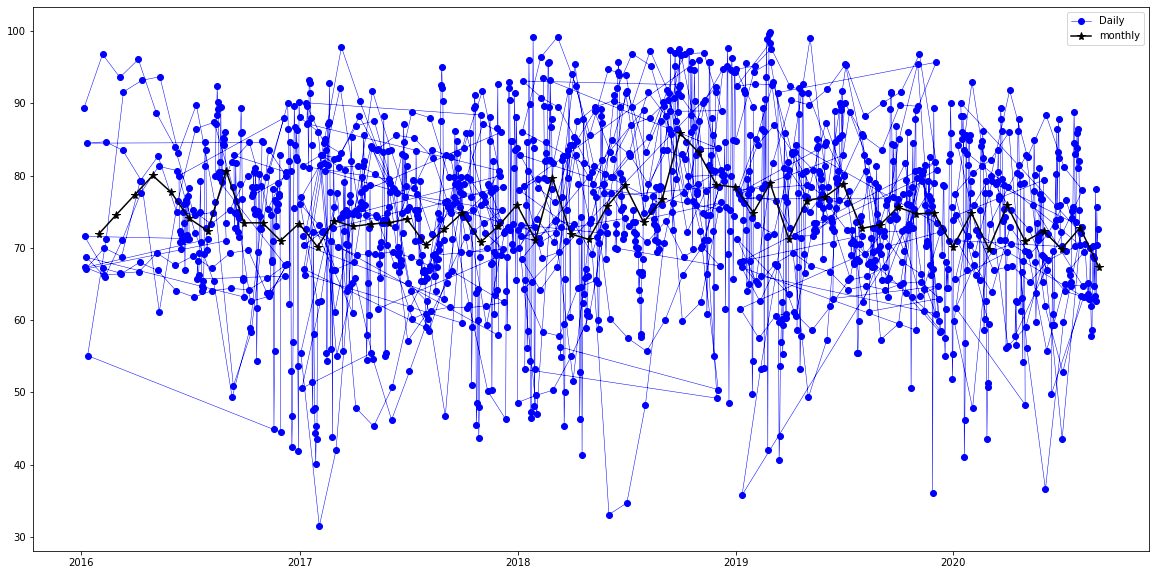

In [17]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2016-01':'2020-08', 'Hum_avg'], marker='o', linestyle='-', linewidth = 0.5, label='Daily', color='blue')
plt.plot(df_month.loc['2016-01':'2020-08', 'Hum_avg'], marker='*', markersize=8, linestyle='-', label='monthly', color='black')
plt.legend()

In [18]:
roll_10=df.rolling(7, center=True).mean()

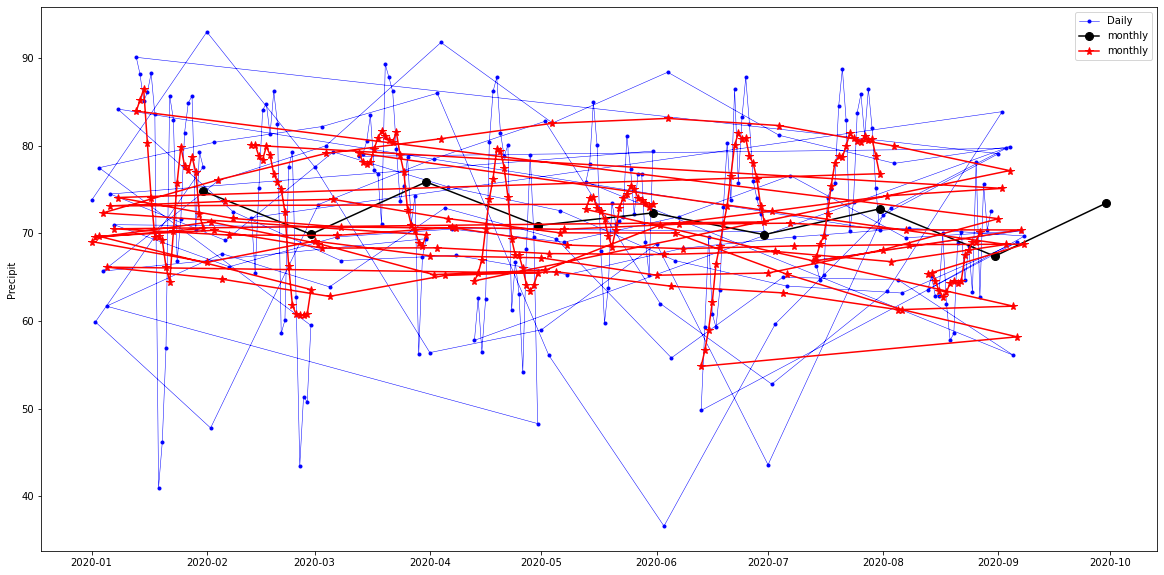

In [19]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2020-01':'2020-09', 'Hum_avg'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='blue')
plt.plot(df_month.loc['2020-01':'2020-09', 'Hum_avg'], marker='o', markersize=8, linestyle='-', label='monthly', color='black')
plt.plot(roll_10.loc['2020-01':'2020-09', 'Hum_avg'], marker='*', markersize=8, linestyle='-', label='monthly', color='red')
plt.ylabel("Precipit")
plt.legend()

# Stationary and Non-Stationary Time series


# Stationarity:

‘Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

###  Agumented Dickey-Fuller(ADF) Test

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Hum_avg"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.818808
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [21]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df["Hum_avg"])
pval=res[1]
if pval>0.05:
     print("Non Stationary")
else:
     print("stationary")

stationary


<AxesSubplot:xlabel='Date'>

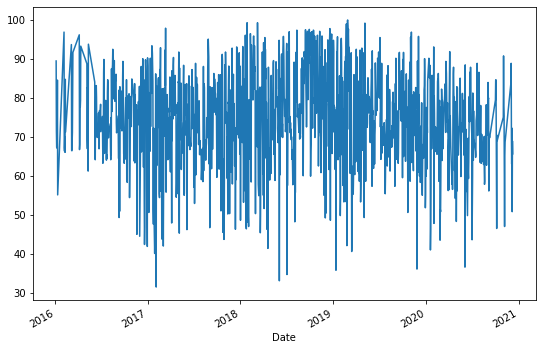

In [22]:
df["Hum_avg"].plot()

# ACF & PACF

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
df_dif2=df_month["Hum_avg"].diff().diff()

C:\Users\Shaheemuddin Farooqi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


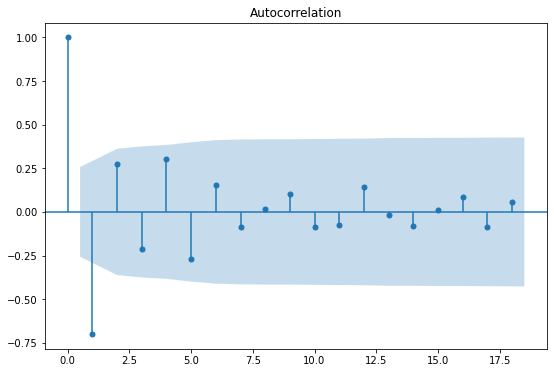

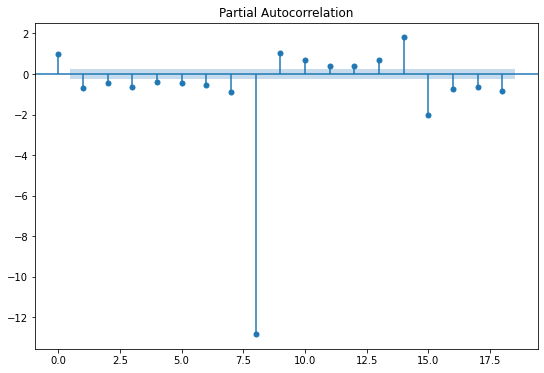

In [25]:
fig=plot_acf(df_dif2.dropna())
fig1=plot_pacf(df_dif2.dropna())


# ARIMA

ARIMA is an acronym for “autoregressive integrated moving average.” It's a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.pip install pmdarima

In [26]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
  Using cached statsmodels-0.12.2-cp38-none-win_amd64.whl (9.4 MB)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Shaheemuddin Farooqi\\anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [27]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
auto_model=auto_arima(df["Hum_avg"],trace=True)

In [ ]:
auto_model.summary()

In [ ]:
X=df_month["Hum_avg"].dropna()

In [ ]:
len(X)

In [ ]:
train_len=int(0.8*len(X))

In [ ]:
train=X[:train_len]
len(train)

In [ ]:
test=X[train_len:]
len(test)

# ARIMA Model

In [ ]:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(4,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
plt.plot(train,label="Train")
plt.plot(test,label="test")
plt.legend()

In [ ]:
ypred_train=model_fit.predict()
ypred_train

In [ ]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
print(ypred_test,test)

In [ ]:
date_test=pd.date_range(start="2020-01-31  ",end="2020-12-31")
date_test

In [ ]:
fix , axs = plt.subplots(2)

axs[0].set_title("Test")
axs[0].plot(test)

axs[1].set_title("Ypred Test")
axs[1].plot(ypred_test)

plt.show()

In [ ]:
residuals=model_fit.resid
residuals.plot(kind='kde')

# MSE and RMSE
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. ... The MSE has the units squared of whatever is plotted on the vertical axis. Another quantity that we calculate is the Root Mean Squared Error (RMSE). It is just the square root of the mean square error.

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

# Forecasting

In [ ]:
#Predict future value for 12 months
model=ARIMA(X,order=(4,1,1))
model_fit=model.fit()

In [ ]:
forecast=model_fit.predict(start=len(X),end=len(X)+11)
forecast

In [ ]:
forecast_date=pd.date_range(start="2021-01-31",end="2021-12-31")
len(forecast_date),len(forecast)

In [ ]:
forecast.index=forecast

In [ ]:
forecast.plot()

# Conclusion

Time series allows you to analyze major patterns such as trends, seasonality, cyclicity, and irregularity. Time series analysis is used for various applications such as stock market analysis, pattern recognition, earthquake prediction, economic forecasting, census analysis and so on.


The purpose of this study is as follows:

1. Using time series to predict Weather condition

2. Comparing the root-mean-square value of each model using time series predictive modeling through several methods.

3. Finding a method suitable for prediction on the Weather dataset

4. Using ARIMA model for future forecasting of Weather and many more

This Data will support the government and experts in making arrangements for what is about to happen. Based on the findings of instantaneous model, these models can be adjusted to guide long time.

Thank you